### Data Feature Descriptions

- **RowNumber**: Just the row index. Not useful for analysis or prediction.
  
- **CustomerId**: Unique ID for each customer. Used for reference only, not included in modeling.
  
- **Surname**: Customer’s last name. Not important for analysis or predictions. Can be dropped.
  
- **CreditScore**: Credit score between 300–850. Higher score = more financially trustworthy. Very important for predicting churn.
  
- **Geography**: Country of the customer (France, Spain, Germany). Important because customer behavior may vary by location.
  
- **Gender**: Male or Female. Sometimes used to analyze behavior patterns.
  
- **Age**: Age of the customer. Older customers might have different behavior or loyalty levels.
  
- **Tenure**: Number of years the customer has been with the bank. Higher tenure = more loyal.
  
- **Balance**: Current balance in the account. A high balance may indicate a higher value customer.
  
- **NumOfProducts**: Number of bank products the customer uses (e.g., loans, cards). More products = more engaged.
  
- **HasCrCard**: Does the customer have a credit card? (1 = Yes, 0 = No). Can reflect financial activity.
  
- **IsActiveMember**: Is the customer actively using the bank? (1 = Yes, 0 = No). Important indicator for churn.
  
- **EstimatedSalary**: Estimated annual income of the customer. Can affect spending habits but not always important.
  
- **Exited**: Did the customer leave the bank? (1 = Yes, 0 = No). This is the target variable you're predicting.

* `Import Libraries`

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

* `Read Churn Dataset`

In [14]:
FILE_PATH = os.path.join(os.getcwd(), "..", "dataset", "churn_Modelling.csv")

In [15]:
df = pd.read_csv(FILE_PATH)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Renaming Columns
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [52]:
df.shape

(9988, 11)

In [18]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
# stats
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [21]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

* `EDA`

In [22]:
# Check NANs
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [53]:
df.duplicated().sum()

np.int64(0)

In [23]:
# Geography
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [24]:
# Gender
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [26]:
# Target
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [27]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [28]:
# Tenure
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

* `Data Visualization & Handling Outliers`

* `Univariate Visualization`

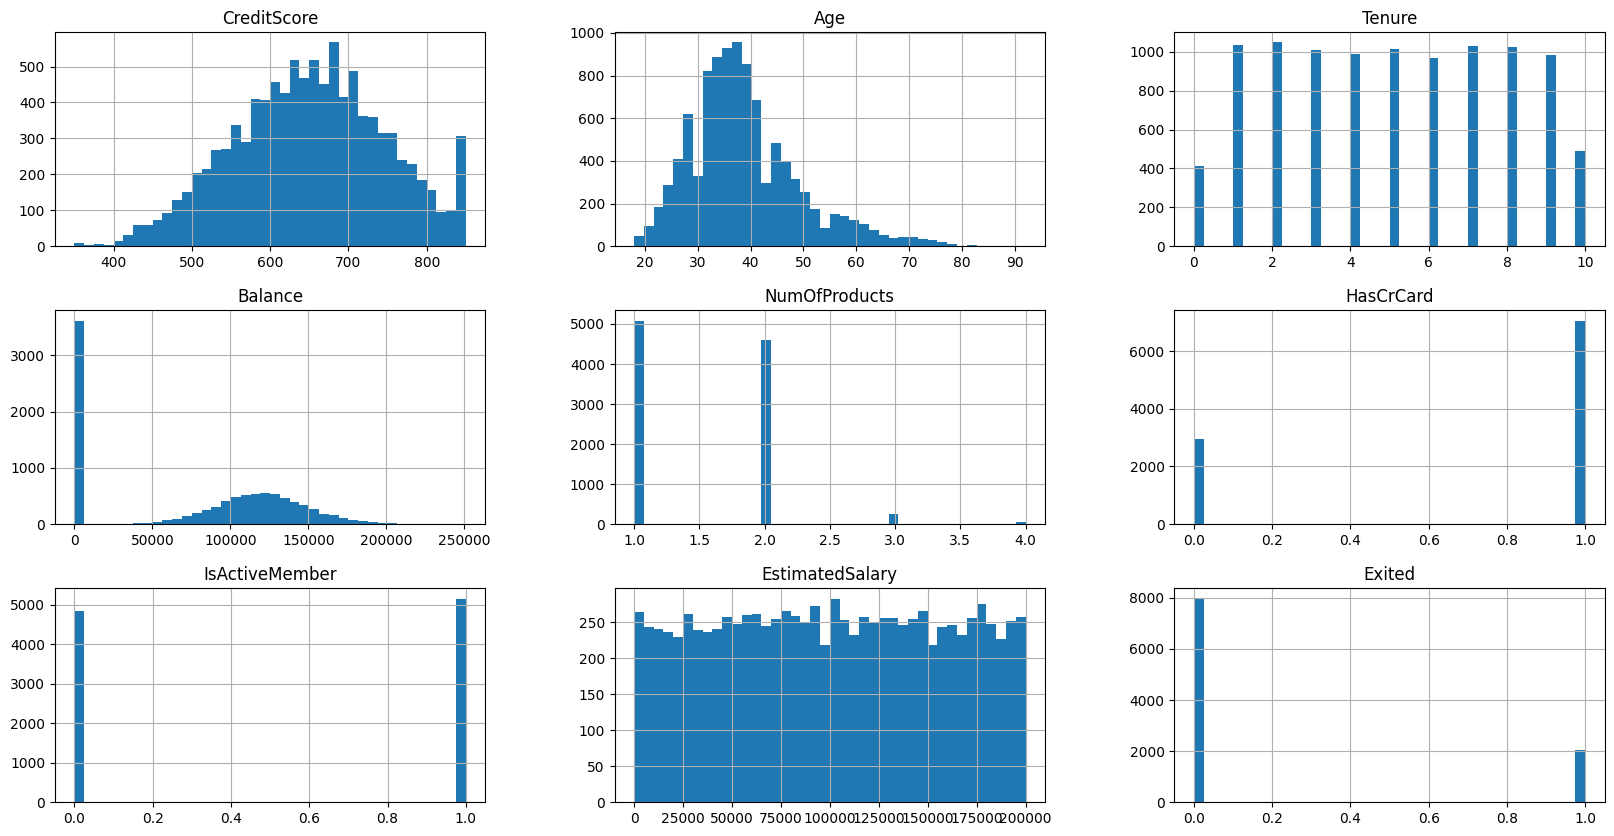

In [29]:
# Numerical Histogram
df.hist(bins=40, figsize=(20, 10))
plt.show()

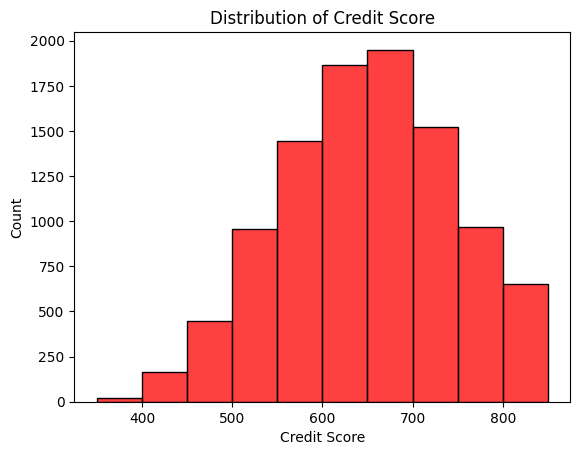

In [55]:
bins = np.arange(350, 851, 50)
sns.histplot(df['CreditScore'], bins=bins, kde=False, color="red")
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

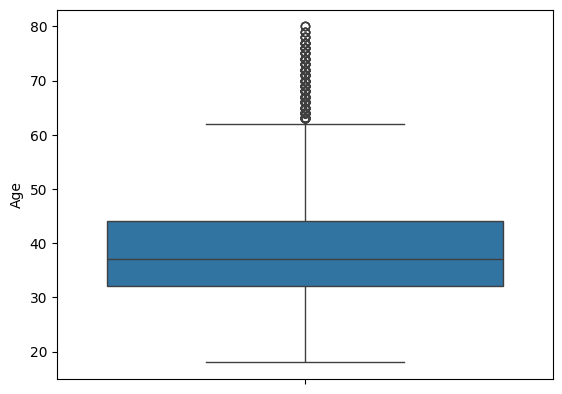

In [50]:
sns.boxplot(df['Age'])
plt.show()

In [33]:
# Drop Some Outliers
df.drop(index=df[df['Age'] > 80].index.tolist(), axis=0, inplace=True)

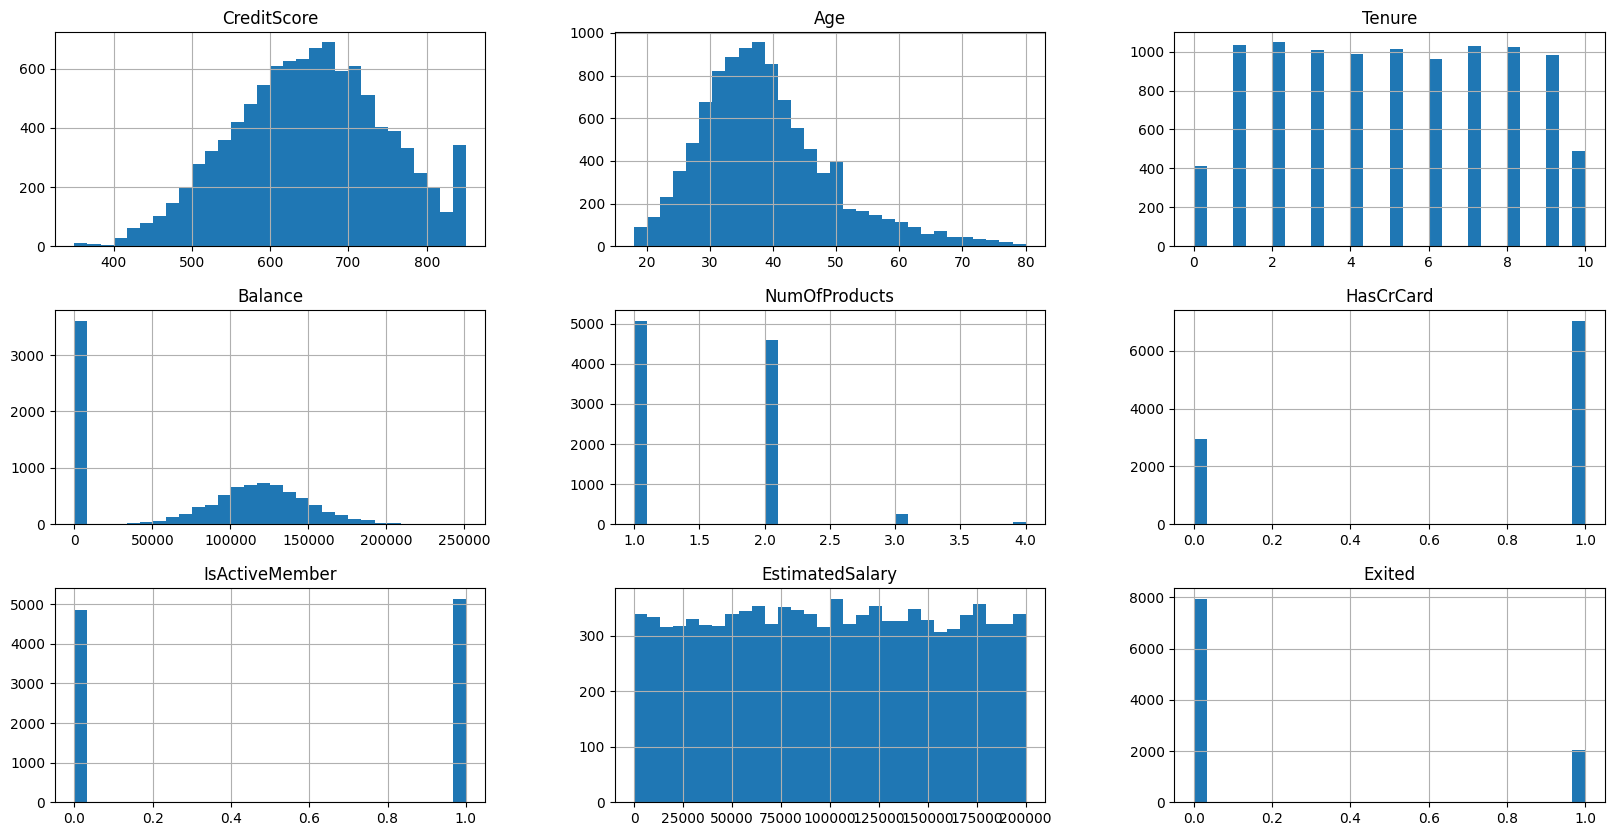

In [34]:
# After: Numerical Histogram
df.hist(bins=30, figsize=(20, 10))
plt.show()

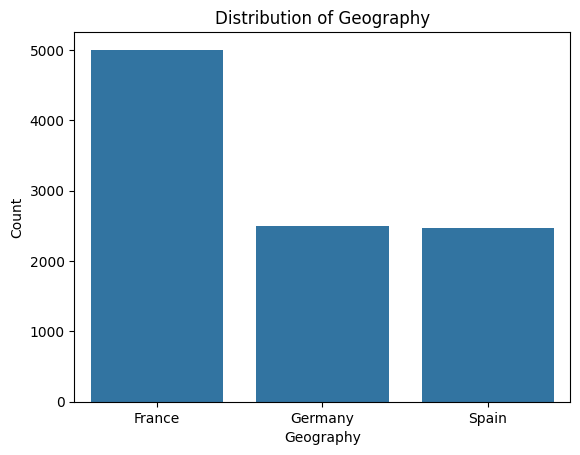

In [ ]:
# Count Plot for Geography
sns.countplot(data=df, x='Geography', order=df['Geography'].value_counts().index.tolist()) # title, xlabel, ylabel

plt.title('Distribution of Geography')
plt.xlabel('Geography')
plt.ylabel('Count')

plt.show()

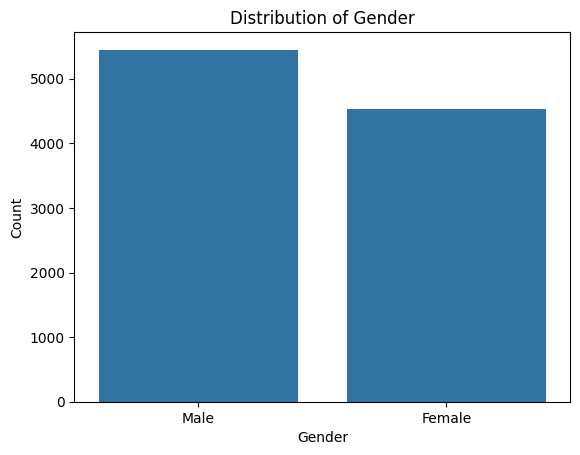

In [ ]:
# Count Plot for Gender
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index.tolist())

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

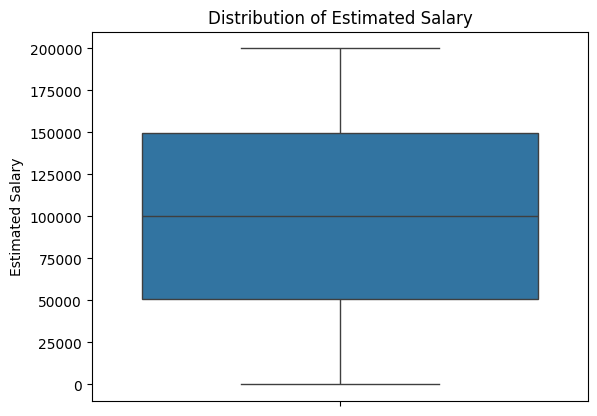

In [ ]:
# BoxPlot for (EstimatedSalary)
sns.boxplot(data=df, y='EstimatedSalary')

plt.title('Distribution of Estimated Salary')
plt.ylabel('Estimated Salary')

plt.show()

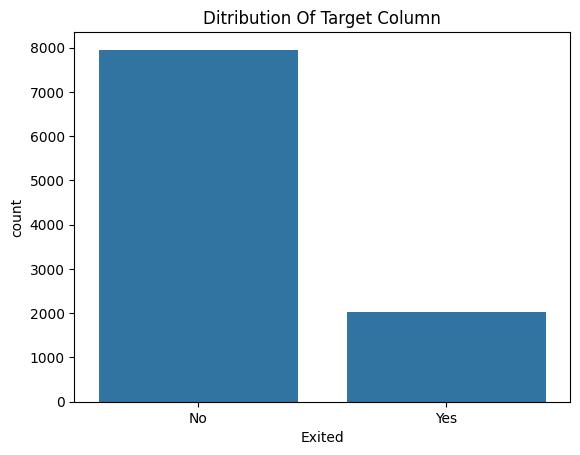

In [43]:
# CountPlot for Exited
sns.countplot(data=df, x='Exited')
plt.title('Ditribution Of Target Column')
plt.xticks(labels=['No', 'Yes'], ticks=[0, 1])
plt.show()

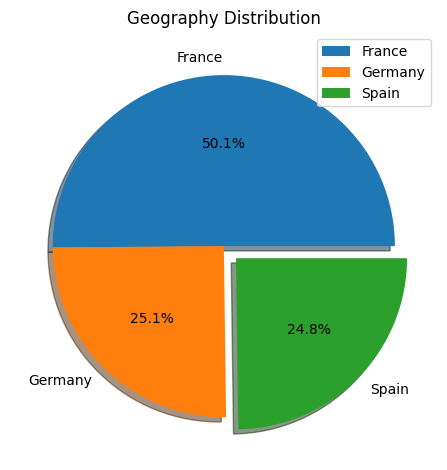

In [58]:
Geography_distribution=df['Geography'].value_counts().head(3)
plt.pie(x=Geography_distribution.values,labels=Geography_distribution.index,explode=[0,0,0.1],normalize=True,shadow=True,
        autopct='%1.1f%%'  
)
plt.title("Geography Distribution")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

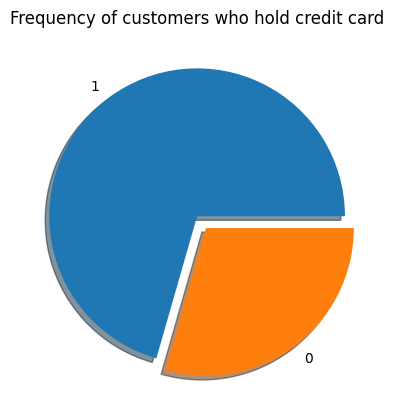

In [60]:
plt.pie(x=df['HasCrCard'].value_counts(),labels=df['HasCrCard'].value_counts().index,explode=[0,0.1],normalize=True,shadow=True)
plt.title("Frequency of customers who hold credit card")
plt.show()

* `BiVariate Visualization`

In [45]:
# for each Gender, get the mean of EstimatedSalary
df.groupby("Gender")[["EstimatedSalary", "Balance"]].mean()

,EstimatedSalary,Balance
Gender,,
Female,100575.998277,75723.367257
Male,99671.901194,77165.717653


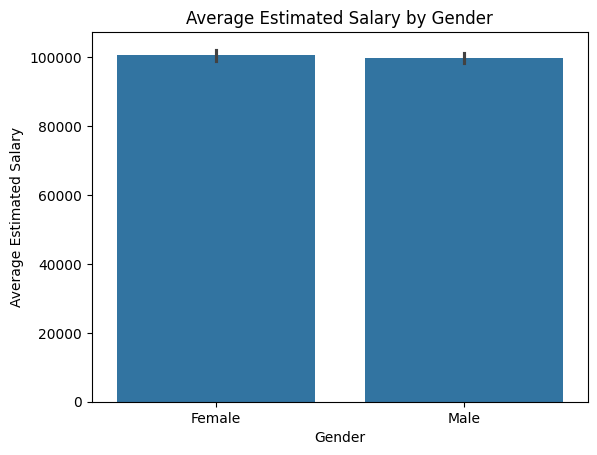

In [ ]:
# Barplot for Gender vs. EstimatedSalary
sns.barplot(data=df, x='Gender', y='EstimatedSalary', estimator="mean")

plt.title('Average Estimated Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Estimated Salary')

plt.show()

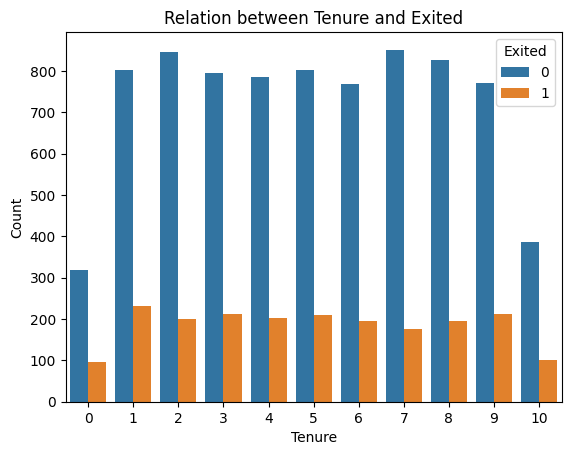

In [49]:
# CountPlot for Relation between Tenure and Exited
sns.countplot(data=df, x='Tenure', hue='Exited')

plt.title('Relation between Tenure and Exited')
plt.xlabel('Tenure')
plt.ylabel('Count')

plt.show()

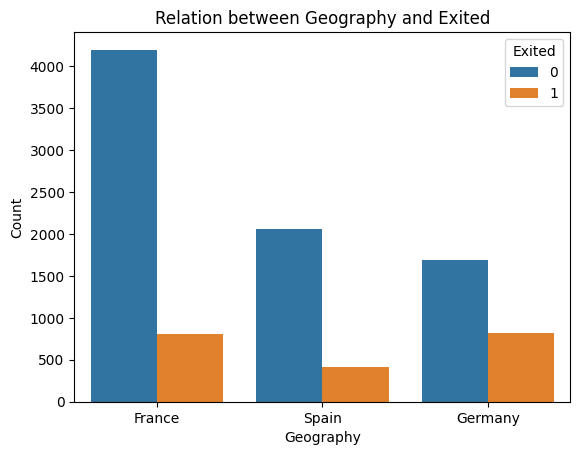

In [51]:
# Geography with Exited
sns.countplot(data=df, x='Geography', hue='Exited')

plt.title('Relation between Geography and Exited')
plt.xlabel('Geography')
plt.ylabel('Count')

plt.show()

----

* `Split To Train & Test`

In [62]:
# To X & y
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

# To Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, shuffle=True, stratify=y)

# Check Shapes
print('X_train.shape: \t', X_train.shape)
print('y_train.shape: \t', y_train.shape)
print('---'*10)
print('X_test.shape: \t', X_test.shape)
print('y_test.shape: \t', y_test.shape)

X_train.shape: 	 (7990, 10)
y_train.shape: 	 (7990,)
------------------------------
X_test.shape: 	 (1998, 10)
y_test.shape: 	 (1998,)


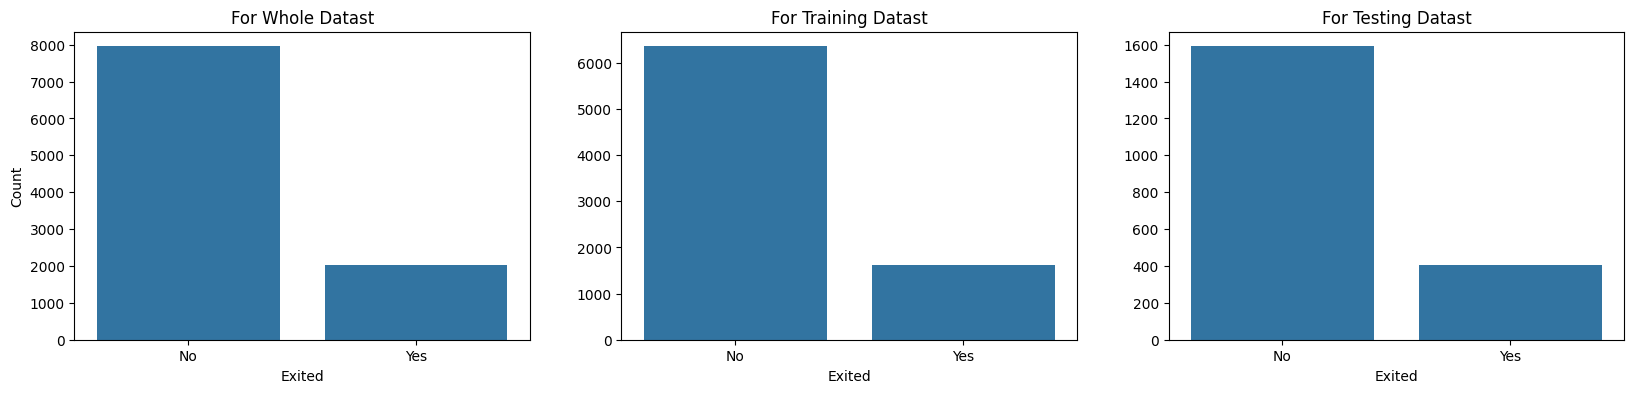

In [63]:
# plottting to check
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

# Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# test
plt.sca(ax[2])
sns.countplot(x=y_test)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

* `Feature Selection & Preprocessing`

In [85]:
# Slice Columns into Categorical & Numerical
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
categ_cols = ['Geography', 'Gender']
ready_cols = list(set(X_train.columns) - set(num_cols) - set(categ_cols))

In [86]:
# For Numerical Columns with Target --> ANOVA(Analysis Of Variance)
_, P_Value = f_classif(X=X_train[num_cols], y=y_train)
P_Value # I want to process with all these features, so assume all P_Values < 0.05 --> Reject H0 --> There is an association between features & Target

array([9.12989970e-002, 1.15359217e-149, 3.56368021e-025, 6.16127881e-001])

In [87]:
P_Value < 0.05

array([False,  True,  True, False])

In [88]:
# For Categorical Columns with Target --> Chi2
_, P_Value = chi2(X=OrdinalEncoder().fit_transform(X_train[categ_cols]), y=y_train)
P_Value < 0.05 # P_Values ~ 0.05 --> Reject H0 --> There is an association between features & Target

array([ True,  True])

In [93]:
ready_cols

['IsActiveMember', 'Tenure', 'HasCrCard', 'NumOfProducts']

In [ ]:
# For Ready Columns with Target --> Chi2
_, P_Value = chi2(X=X_train[ready_cols], y=y_train)
P_Value < 0.05 # I want to process with all these features, so assume all P_Values < 0.05 --> Reject H0 --> There is an association between features & Target

array([ True, False, False, False])

In [103]:
# Pipeline

# Numerical: num_cols --> Imputing using median, and Standardization
# Categorical: categ_cols --> Imputing using Mode(Most Frequent), and OHE
# Raedy: ready_cols --> Imputing using Mode(Most Requent)

# For Numerical
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

# For Categorical
categ_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(sparse_output=False, drop="first"))
    ]
)

# For Ready Columns
ready_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
    ]
)

# Combine All
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("categ", categ_pipeline, categ_cols),
        ("ready", ready_pipeline, ready_cols)
    ]
)

# Apply
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

In [106]:
X_train_final.shape, y_train.shape

((7990, 11), (7990,))

In [107]:
X_test_final.shape, y_test.shape

((1998, 11), (1998,))

In [108]:
# Make a folder for artifacts
ARTIFACT_FOLDER_PATH = os.path.join(os.getcwd(), "..", "artifacts")
os.makedirs(ARTIFACT_FOLDER_PATH, exist_ok=True)

In [ ]:
# Dump Pipeline
joblib.dump(preprocessor, os.path.join(ARTIFACT_FOLDER_PATH, 'preprocessor.pkl'))

----

* `Dealing with Imbalanced Data`

In [117]:
# 1. Using Class Weights for Solving Imbalanced Data
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / sum(vals_count)
dict_weights = {}
for i in range(2):  # 2 classes (0, 1)
    dict_weights[i] = vals_count[i]

# to model
dict_weights

{0: np.float64(0.20387984981226537), 1: np.float64(0.7961201501877346)}

In [123]:
# 2. Using UnderSampling or OverSampling

# Using SMOTE
overSampling = SMOTE(sampling_strategy=0.7, k_neighbors=5, random_state=42)
X_train_resampled, y_train_resampled = overSampling.fit_resample(X_train_final, y_train)

In [125]:
y_train_resampled.value_counts(normalize=True)

Exited
0    0.588273
1    0.411727
Name: proportion, dtype: float64

----

* `Building Models`
> Let's Consider Evaluation Using `F1-Score`

* `LogisticRegression`

In [ ]:
# 1. Using LogisticRegression without Considering any method for Solving Imbalanced
log_clf = LogisticRegression(C=1.5)
log_clf.fit(X_train_final, y_train)

# Predict
y_predict_train_log = log_clf.predict(X_train_final)
y_predict_test_log = log_clf.predict(X_test_final)

# Evaluate
score_train_log = f1_score(y_train, y_predict_train_log)
score_test_log = f1_score(y_test, y_predict_test_log)

print(f'The f1_score using Logistic model for Training Dataset is {score_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset is {score_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset is 30.888
The f1_score using Logistic model for Testing Dataset is 37.500


In [ ]:
# 2. Using LogisticRegression -- Using Class_Weight
log_clf = LogisticRegression(C=1.5, class_weight=dict_weights)
log_clf.fit(X_train_final, y_train)

# Predict
y_predict_train_log = log_clf.predict(X_train_final)
y_predict_test_log = log_clf.predict(X_test_final)

# Evaluate
score_train_log = f1_score(y_train, y_predict_train_log)
score_test_log = f1_score(y_test, y_predict_test_log)

print(f'The f1_score using Logistic model for Training Dataset is {score_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset is {score_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset is 49.814
The f1_score using Logistic model for Testing Dataset is 49.915


In [ ]:
# 3. Using LogisticRegression -- Using SMOTE
log_clf = LogisticRegression(C=1.5)
log_clf.fit(X_train_resampled, y_train_resampled)

# Predict
y_predict_train_log = log_clf.predict(X_train_final)
y_predict_test_log = log_clf.predict(X_test_final)

# Evaluate
score_train_log = f1_score(y_train, y_predict_train_log)
score_test_log = f1_score(y_test, y_predict_test_log)

print(f'The f1_score using Logistic model for Training Dataset is {score_train_log*100:.3f}')
print(f'The f1_score using Logistic model for Testing Dataset is {score_test_log*100:.3f}')

The f1_score using Logistic model for Training Dataset is 49.946
The f1_score using Logistic model for Testing Dataset is 50.628


In [140]:
# as JSON
# classification_report(y_test, y_predict_test_log, output_dict=True)
print(classification_report(y_test, y_predict_test_log))

              precision    recall  f1-score   support

           0       0.89      0.81      0.84      1591
           1       0.44      0.59      0.51       407

    accuracy                           0.76      1998
   macro avg       0.66      0.70      0.68      1998
weighted avg       0.80      0.76      0.78      1998



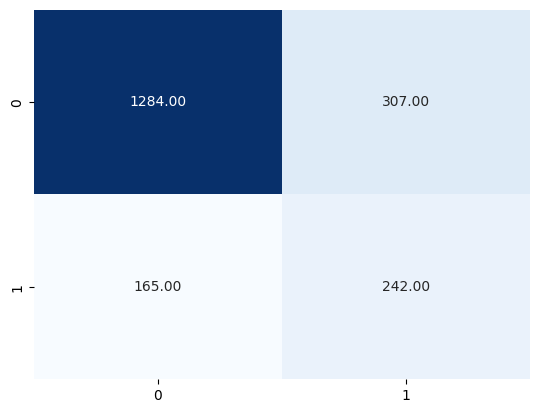

In [135]:
sns.heatmap(confusion_matrix(y_test, y_predict_test_log), annot=True, cbar=False, cmap='Blues', fmt=".2f")
plt.show()

* `Random Forest`

In [ ]:
# Using Random Forest with Class_Weights
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42, class_weight=dict_weights)
forest_clf.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_final)
y_pred_test_foerst = forest_clf.predict(X_test_final)

# Using f1_score
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_foerst)

print(f'The f1_score using RF model for Training Dataset with class_weights is {score_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset with class_weights is {score_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset with class_weights is 60.524
The f1_score using RF model for Testing Dataset with class_weights is 58.541


In [142]:
# Using Random Forest with SMOTE
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
forest_clf.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_final)
y_pred_test_forest = forest_clf.predict(X_test_final)

# Using f1_score
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_forest)

print(f'The f1_score using RF model for Training Dataset with SMOTE is {score_train_forest*100:.3f}')
print(f'The f1_score using RF model for Testing Dataset with SMOTE is {score_test_forest*100:.3f}')

The f1_score using RF model for Training Dataset with SMOTE is 60.837
The f1_score using RF model for Testing Dataset with SMOTE is 59.309


* `RF-Tuning`